In [ ]:
!pip install statsmodels


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [149]:
train = pd.read_csv('data/train_egg_sales.csv', delimiter=';')
meta_data = pd.read_csv("data/metaData.csv", delimiter=';')
sample_submission = pd.read_csv("data/sample_submission updated.csv", delimiter=';')
test = pd.read_csv("data/test_egg_sales.csv", delimiter=';')

In [95]:
train.head()

,Date,Egg Sales
0,1993-01-01,91
1,1993-01-02,124
2,1993-01-03,112
3,1993-01-04,115
4,1993-01-05,107


In [96]:
train.describe()

,Egg Sales
count,10592.000000
mean,366.326095
std,155.202620
min,0.000000
25%,235.000000
50%,366.000000
75%,499.000000
max,713.000000


# Validate the dataframes

In [97]:
train.isnull().sum()

Date         0
Egg Sales    0
dtype: int64

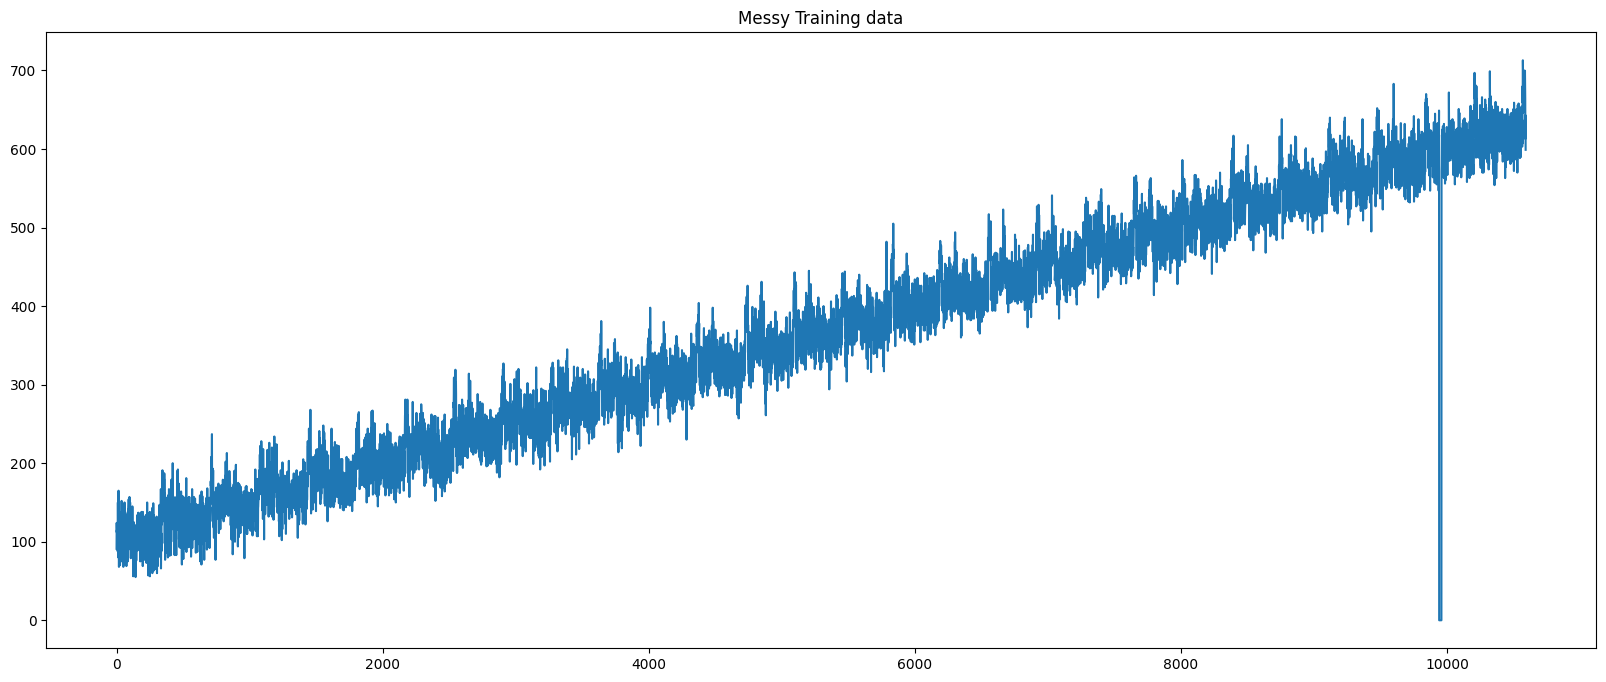

In [98]:
plt.figure(figsize=(20,8))
plt.title('Messy Training data')
plt.plot(train['Egg Sales'])

# Feature Engineering
- because there are not much features in the data to train.
  

In [103]:
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['Day_of_Week'] = train['Date'].dt.dayofweek
# Create lag features (e.g., previous day's sales)
train['Lag_1'] = train['Egg Sales'].shift(1)
train['Lag_2'] = train['Egg Sales'].shift(2)

The dataset now includes the following new features:

- Year: The year of the sales data.
- Month: The month of the sales data.
- Day: The day of the month for the sales data.
- Day_of_Week: The day of the week (0=Monday, 1=Tuesday, etc.).
- Lag_1 and Lag_2: Sales values from the 1st and 2nd previous days, respectively.

In [104]:
train

,Date,Egg Sales,Year,Month,Day,Day_of_Week,Lag_1,Lag_2
0,1993-01-01,91,1993,1,1,4,NaN,NaN
1,1993-01-02,124,1993,1,2,5,91.0,NaN
2,1993-01-03,112,1993,1,3,6,124.0,91.0
3,1993-01-04,115,1993,1,4,0,112.0,124.0
4,1993-01-05,107,1993,1,5,1,115.0,112.0
...,...,...,...,...,...,...,...,...
10587,2021-12-27,681,2021,12,27,0,699.0,693.0
10588,2021-12-28,664,2021,12,28,1,681.0,699.0
10589,2021-12-29,613,2021,12,29,2,664.0,681.0
10590,2021-12-30,643,2021,12,30,3,613.0,664.0


In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Drop the 'Date' column as it's not needed for model training
train = train.sort_values('Date')
df_model = train.drop(['Date'], axis=1)


# Because of the lag it will contain some null values. so we are dropping them
df_model = df_model.dropna()

# Extract features and target variable from the dataframe
X = df_model.drop(['Egg Sales'], axis=1)
y = df_model['Egg Sales']

In [123]:
print(X_train.dtypes)


Year             int32
Month            int32
Day              int32
Day_of_Week      int32
Lag_1          float64
Lag_2          float64
dtype: object


In [125]:
# Split the data into training and testing sets (70% training and 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

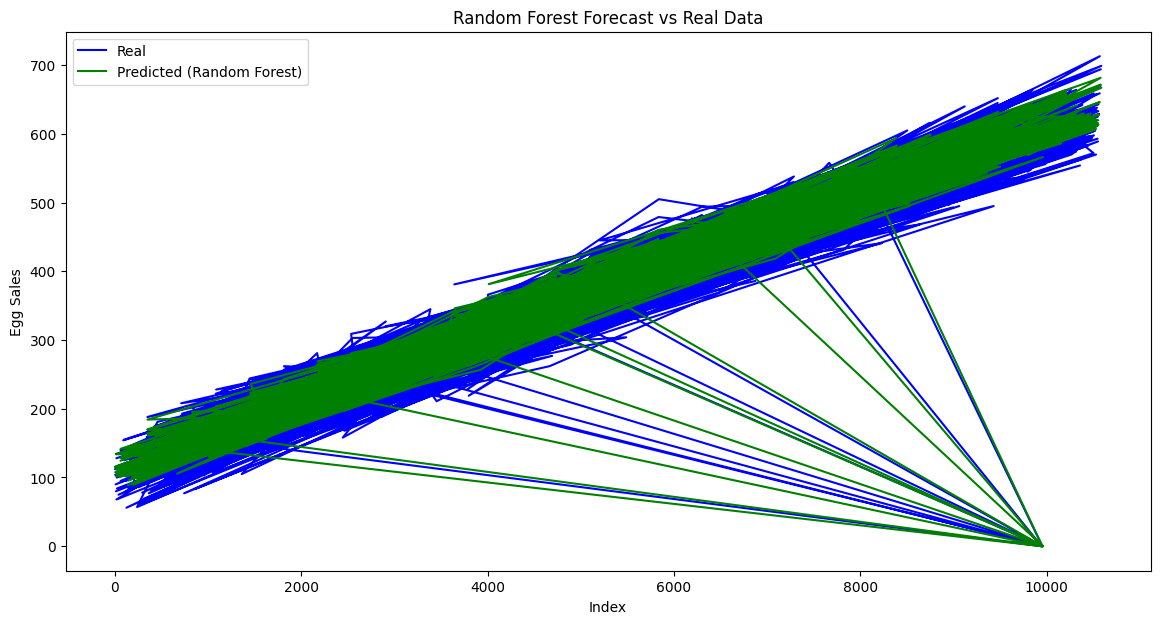

735.6676905571293

In [126]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Plotting the real and predicted values
plt.figure(figsize=(14, 7))
plt.plot(X_test.index, y_test, label='Real', color='blue')
plt.plot(X_test.index, y_pred_rf, label='Predicted (Random Forest)', color='green')
plt.xlabel('Index')
plt.ylabel('Egg Sales')
plt.title('Random Forest Forecast vs Real Data')
plt.legend()
plt.show()

mse_rf

# Evaluation

In [127]:
rf_model.feature_importances_

array([0.14833676, 0.00443257, 0.00432202, 0.00229959, 0.68516859,
       0.15544046])

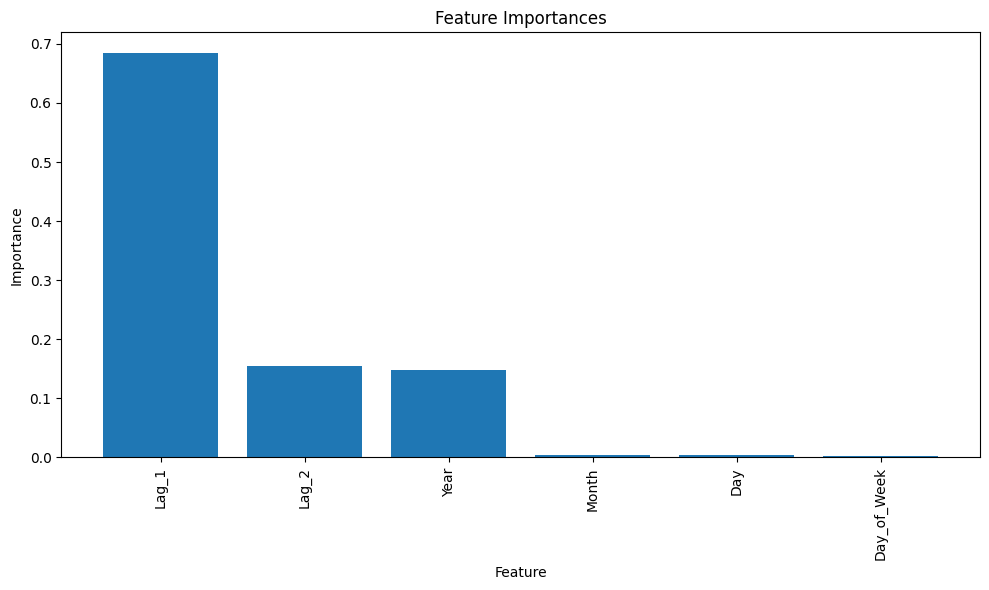

In [129]:
# Get feature importances from the RF model
importances = rf_model.feature_importances_
feature_names = rf_model.feature_names_in_
# Match feature importances with their corresponding names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_df)), feature_importance_df['Importance'], tick_label=feature_importance_df['Feature'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()

# Submission

In [133]:
sample_submission

,ID,Expected
0,2022-01-01,-1
1,2022-01-02,-1
2,2022-01-03,-1
3,2022-01-04,-1
4,2022-01-05,-1
...,...,...
353,2022-12-20,-1
354,2022-12-21,-1
355,2022-12-22,-1
356,2022-12-23,-1


In [135]:
test


,Date
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
...,...
353,2022-12-20
354,2022-12-21
355,2022-12-22
356,2022-12-23


In [145]:
def feature_engineering(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
    data['Day_of_Week'] = data['Date'].dt.dayofweek
    data = data.dropna()
    return data
    

In [150]:
train_data = feature_engineering(train)
train_data.describe()

,Date,Egg Sales,Year,Month,Day,Day_of_Week
count,10592,10592.000000,10592.000000,10592.000000,10592.000000,10592.000000
mean,2007-07-02 12:00:00,366.326095,2007.000661,6.523036,15.729324,3.000094
min,1993-01-01 00:00:00,0.000000,1993.000000,1.000000,1.000000,0.000000
25%,2000-04-01 18:00:00,235.000000,2000.000000,4.000000,8.000000,1.000000
50%,2007-07-02 12:00:00,366.000000,2007.000000,7.000000,16.000000,3.000000
75%,2014-10-01 06:00:00,499.000000,2014.000000,10.000000,23.000000,5.000000
max,2021-12-31 00:00:00,713.000000,2021.000000,12.000000,31.000000,6.000000
std,NaN,155.202620,8.366798,3.448837,8.800375,2.000024


In [153]:
X = train_data.drop(['Date','Egg Sales'], axis=1)
y = train_data['Egg Sales']



In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [155]:
test_data = feature_engineering(test)
test_data

,Date,Year,Month,Day,Day_of_Week
0,2022-01-01,2022,1,1,5
1,2022-01-02,2022,1,2,6
2,2022-01-03,2022,1,3,0
3,2022-01-04,2022,1,4,1
4,2022-01-05,2022,1,5,2
...,...,...,...,...,...
353,2022-12-20,2022,12,20,1
354,2022-12-21,2022,12,21,2
355,2022-12-22,2022,12,22,3
356,2022-12-23,2022,12,23,4


In [158]:
y_pred = rf_model.predict(test_data.drop('Date', axis=1))

In [159]:
realy = test_data.drop('Date', axis=1)

In [161]:
test_data

,Date,Year,Month,Day,Day_of_Week
0,2022-01-01,2022,1,1,5
1,2022-01-02,2022,1,2,6
2,2022-01-03,2022,1,3,0
3,2022-01-04,2022,1,4,1
4,2022-01-05,2022,1,5,2
...,...,...,...,...,...
353,2022-12-20,2022,12,20,1
354,2022-12-21,2022,12,21,2
355,2022-12-22,2022,12,22,3
356,2022-12-23,2022,12,23,4


In [165]:
test_data['Expected'] = y_pred

In [166]:
test_data

,Date,Year,Month,Day,Day_of_Week,Expected
0,2022-01-01,2022,1,1,5,600.67
1,2022-01-02,2022,1,2,6,594.14
2,2022-01-03,2022,1,3,0,607.88
3,2022-01-04,2022,1,4,1,605.00
4,2022-01-05,2022,1,5,2,604.74
...,...,...,...,...,...,...
353,2022-12-20,2022,12,20,1,671.50
354,2022-12-21,2022,12,21,2,668.54
355,2022-12-22,2022,12,22,3,662.59
356,2022-12-23,2022,12,23,4,667.00


In [169]:
submission = test_data.rename(columns={'Date': 'ID'}).drop(['Year', 'Month', 'Day', 'Day_of_Week'], axis=1)


In [173]:
submission.to_csv('submission.csv', index=False)

In [171]:
submission

,ID,Expected
0,2022-01-01,600.67
1,2022-01-02,594.14
2,2022-01-03,607.88
3,2022-01-04,605.00
4,2022-01-05,604.74
...,...,...
353,2022-12-20,671.50
354,2022-12-21,668.54
355,2022-12-22,662.59
356,2022-12-23,667.00


In [172]:
pd.read_csv('submission.csv').drop()

,Unnamed: 0,ID,Expected
0,0,2022-01-01,600.67
1,1,2022-01-02,594.14
2,2,2022-01-03,607.88
3,3,2022-01-04,605.00
4,4,2022-01-05,604.74
...,...,...,...
353,353,2022-12-20,671.50
354,354,2022-12-21,668.54
355,355,2022-12-22,662.59
356,356,2022-12-23,667.00
